In [88]:
import time
import pandas as pd
import os
import numpy as np
import seaborn as sns
import inspect, re
import matplotlib.pyplot as plt
import missingno as msno
from yellowbrick.features import Rank2D
import math
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelBinarizer

In [89]:
datapath='/Users/qisi_cao/Desktop/Kaggle Proj/data'

In [90]:
data = pd.read_csv(datapath+'/complete_train.csv')

In [91]:
columns_names=data.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['building_id', 'meter', 'timestamp', 'meter_reading', 'site_id', 'primary_use', 'square_feet', 'floor_count', 'air_temperature', 'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction', 'wind_speed', 'day', 'week', 'month']


In [92]:
data.shape

(20125605, 18)

In [113]:
data['meter']

array([0, 1, 3, 2])

In [94]:
data.corr()

,building_id,meter,meter_reading,site_id,square_feet,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,day,week,month
building_id,1.000000,0.222599,0.008848,0.980872,0.088990,-0.026065,-0.314144,-0.192753,-0.110094,0.069304,0.075021,0.044379,0.003296,0.001167,0.015730,0.016086
meter,0.222599,1.000000,0.017710,0.254355,0.132866,0.117814,-0.011167,-0.161465,-0.080480,0.012199,-0.051851,-0.026344,-0.081308,0.000356,0.005198,0.005565
meter_reading,0.008848,0.017710,1.000000,0.011996,0.024347,0.016063,-0.004135,0.008810,-0.003333,-0.000565,-0.004233,0.000142,0.006081,-0.000055,-0.006902,-0.006713
site_id,0.980872,0.254355,0.011996,1.000000,0.092335,-0.018375,-0.307187,-0.163930,-0.135168,0.064482,0.053829,0.047934,0.011287,0.001051,0.015589,0.015958
square_feet,0.088990,0.132866,0.024347,0.092335,1.000000,0.727884,-0.015680,-0.016836,-0.023490,0.029091,-0.020992,-0.018041,-0.035155,-0.000181,-0.002444,-0.002618
floor_count,-0.026065,0.117814,0.016063,-0.018375,0.727884,1.000000,-0.029455,-0.057703,-0.026579,0.043967,-0.019711,-0.002175,-0.035130,-0.000410,-0.000203,-0.000222
air_temperature,-0.314144,-0.011167,-0.004135,-0.307187,-0.015680,-0.029455,1.000000,0.023852,0.750682,0.003666,-0.310749,-0.107869,-0.082422,0.019978,0.141274,0.168540
cloud_coverage,-0.192753,-0.161465,0.008810,-0.163930,-0.016836,-0.057703,0.023852,1.000000,0.086628,0.015980,-0.086990,0.030400,0.180046,-0.007244,-0.015013,-0.018910
dew_temperature,-0.110094,-0.080480,-0.003333,-0.135168,-0.023490,-0.026579,0.750682,0.086628,1.000000,0.091626,-0.218015,-0.183834,-0.142284,0.018760,0.216559,0.241765
precip_depth_1_hr,0.069304,0.012199,-0.000565,0.064482,0.029091,0.043967,0.003666,0.015980,0.091626,1.000000,-0.054368,0.010816,0.024446,0.007155,0.024602,0.028461


Text(0.5, 1, 'Correlation between different fearures')

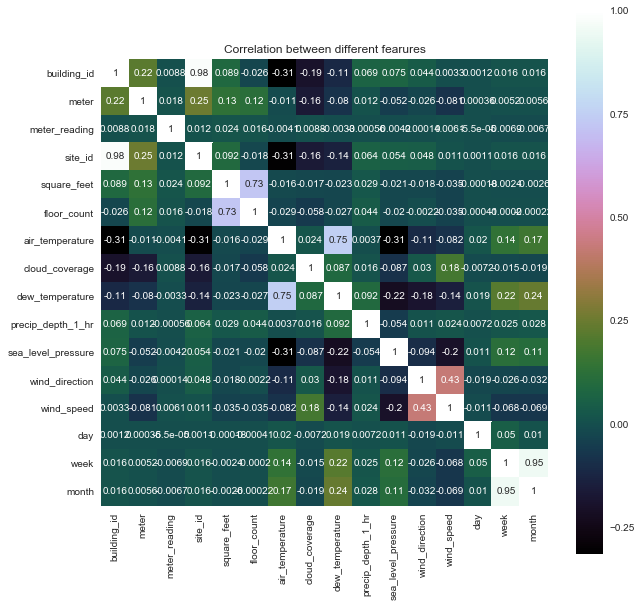

In [61]:
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [95]:
data_drop=data.drop(labels=['site_id', 'building_id', 'day', 'week', 'month', 'timestamp', 'primary_use', 'meter', 'meter_reading'],axis=1)
data_drop.head()

,square_feet,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,7432,3.0,25.0,6.0,20.0,0.084507,1019.7,0.0,0.0
1,2720,3.0,25.0,6.0,20.0,0.084507,1019.7,0.0,0.0
2,5376,3.0,25.0,6.0,20.0,0.084507,1019.7,0.0,0.0
3,23685,3.0,25.0,6.0,20.0,0.084507,1019.7,0.0,0.0
4,116607,4.0,25.0,6.0,20.0,0.084507,1019.7,0.0,0.0


In [96]:
X = data_drop.iloc[:,0:8].values
X

array([[7.43200000e+03, 3.00000000e+00, 2.50000000e+01, ...,
        8.45070423e-02, 1.01970000e+03, 0.00000000e+00],
       [2.72000000e+03, 3.00000000e+00, 2.50000000e+01, ...,
        8.45070423e-02, 1.01970000e+03, 0.00000000e+00],
       [5.37600000e+03, 3.00000000e+00, 2.50000000e+01, ...,
        8.45070423e-02, 1.01970000e+03, 0.00000000e+00],
       ...,
       [2.11680000e+04, 4.00000000e+00, 5.60000000e+00, ...,
        1.80000000e+00, 1.01520000e+03, 1.10000000e+02],
       [2.11680000e+04, 4.00000000e+00, 1.11000000e+01, ...,
        1.80000000e+00, 1.01390000e+03, 1.50000000e+02],
       [2.11680000e+04, 4.00000000e+00, 1.50000000e+01, ...,
        1.80000000e+00, 1.01200000e+03, 1.60000000e+02]])

In [97]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [98]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00000005  0.72788407 -0.01568031 -0.0168362  -0.02348999  0.0290907
  -0.02099176 -0.01804124]
 [ 0.72788407  1.00000005 -0.02945486 -0.05770264 -0.02657882  0.04396715
  -0.0197111  -0.0021751 ]
 [-0.01568031 -0.02945486  1.00000005  0.02385202  0.7506822   0.00366648
  -0.31074933 -0.10786867]
 [-0.0168362  -0.05770264  0.02385202  1.00000005  0.08662798  0.01598037
  -0.08698961  0.03040008]
 [-0.02348999 -0.02657882  0.7506822   0.08662798  1.00000005  0.0916256
  -0.21801455 -0.18383435]
 [ 0.0290907   0.04396715  0.00366648  0.01598037  0.0916256   1.00000005
  -0.05436784  0.01081619]
 [-0.02099176 -0.0197111  -0.31074933 -0.08698961 -0.21801455 -0.05436784
   1.00000005 -0.09385123]
 [-0.01804124 -0.0021751  -0.10786867  0.03040008 -0.18383435  0.01081619
  -0.09385123  1.00000005]]


In [99]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00000005  0.72788407 -0.01568031 -0.0168362  -0.02348999  0.0290907
  -0.02099176 -0.01804124]
 [ 0.72788407  1.00000005 -0.02945486 -0.05770264 -0.02657882  0.04396715
  -0.0197111  -0.0021751 ]
 [-0.01568031 -0.02945486  1.00000005  0.02385202  0.7506822   0.00366648
  -0.31074933 -0.10786867]
 [-0.0168362  -0.05770264  0.02385202  1.00000005  0.08662798  0.01598037
  -0.08698961  0.03040008]
 [-0.02348999 -0.02657882  0.7506822   0.08662798  1.00000005  0.0916256
  -0.21801455 -0.18383435]
 [ 0.0290907   0.04396715  0.00366648  0.01598037  0.0916256   1.00000005
  -0.05436784  0.01081619]
 [-0.02099176 -0.0197111  -0.31074933 -0.08698961 -0.21801455 -0.05436784
   1.00000005 -0.09385123]
 [-0.01804124 -0.0021751  -0.10786867  0.03040008 -0.18383435  0.01081619
  -0.09385123  1.00000005]]


In [100]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-9.72147483e-02 -6.95136899e-01  6.94638071e-01  1.20299113e-01
   3.27080329e-02  7.43340354e-02 -6.11877836e-02  8.65304853e-04]
 [-1.07364672e-01 -6.95879386e-01 -6.97546003e-01 -1.19766628e-01
   3.88861521e-02  1.44189556e-02 -3.98522967e-02 -1.41140562e-03]
 [ 6.40450511e-01 -8.19248810e-02  1.19576369e-01 -6.93864509e-01
   2.35227053e-01 -1.19457204e-01 -1.13863824e-01 -6.92692723e-02]
 [ 1.10280773e-01  4.76187267e-02 -2.77637837e-02 -7.28646425e-02
   6.85149713e-02  8.91285781e-01 -4.92725125e-02  4.21874507e-01]
 [ 6.36568421e-01 -7.89001603e-02 -1.20950049e-01  6.82190710e-01
   3.00099901e-01  1.80116016e-02  3.35791279e-02 -1.30500594e-01]
 [ 7.57294173e-02 -8.48635741e-02  3.06815350e-02 -8.15277762e-02
   7.40039734e-03 -6.30087092e-02  9.62367225e-01  2.22035032e-01]
 [-3.49137563e-01  9.23901876e-02  1.55804504e-02 -9.32573553e-02
   7.37001371e-01  2.18133904e-01  1.50551248e-01 -4.97200393e-01]
 [-1.54376414e-01  3.99291202e-02  5.01670184e-03  6.08

In [101]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.95339466901387
1.7326784754071998
1.1315184247032095
0.9878446930696246
0.9613235716772985
0.7312171655606599
0.27181640003499796
0.23020699803787317


In [102]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

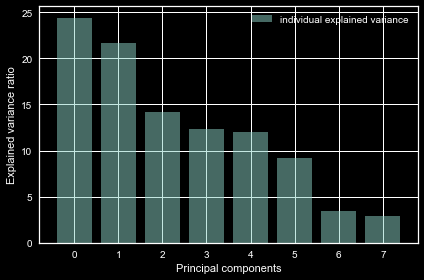

In [103]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(8), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [104]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(8,1), 
                      eig_pairs[1][1].reshape(8,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.09721475 -0.6951369 ]
 [-0.10736467 -0.69587939]
 [ 0.64045051 -0.08192488]
 [ 0.11028077  0.04761873]
 [ 0.63656842 -0.07890016]
 [ 0.07572942 -0.08486357]
 [-0.34913756  0.09239019]
 [-0.15437641  0.03992912]]


In [105]:
y = X_std.dot(matrix_w)

Text(0, 0.5, 'Cumulative explained variance')

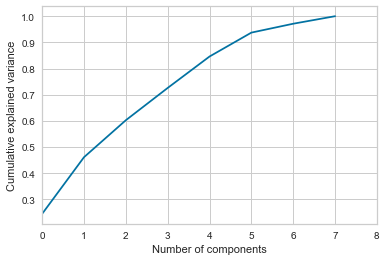

In [106]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,8,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [107]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=8)
Y_sklearn = sklearn_pca.fit_transform(X_std)
print(Y_sklearn)

[[-1.67510196 -0.92820661 -0.86130275 ... -0.1595801  -0.28544222
   0.03697276]
 [-1.67901174 -0.95616359 -0.86133755 ... -0.15826465 -0.31337914
   0.04181095]
 [-1.67680793 -0.94040516 -0.86131793 ... -0.15900613 -0.29763201
   0.03908382]
 ...
 [ 0.59732235 -0.66921094 -0.19814651 ...  0.74578541 -0.5032723
  -0.33482481]
 [ 0.25948248 -0.62772358  0.13863046 ...  0.56374358 -0.44584895
  -0.02150189]
 [-0.13727118 -0.61431275  0.64604768 ...  0.57830098 -0.42892421
   0.25206438]]


### Ignore this one, not right

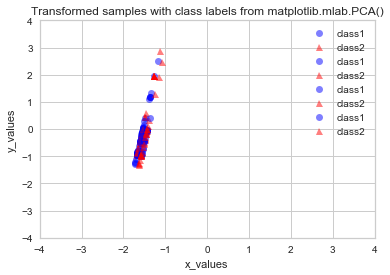

In [112]:
plt.plot(Y_sklearn[0:20,0],Y_sklearn[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(Y_sklearn[20:40,0], Y_sklearn[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.plot(Y_sklearn[40:60,0],Y_sklearn[40:60,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(Y_sklearn[60:80,0], Y_sklearn[60:80,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.plot(Y_sklearn[80:100,0],Y_sklearn[80:100,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(Y_sklearn[100:120,0], Y_sklearn[100:120,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.plot(Y_sklearn[120:140,0],Y_sklearn[120:140,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(Y_sklearn[140:160,0], Y_sklearn[140:160,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

In [33]:
groupby_primary_use=data.groupby('primary_use').mean()
groupby_primary_use

,site_id,building_id,square_feet,year_built,floor_count
primary_use,,,,,
Education,6.384335,687.628415,104329.000000,1962.579755,4.732558
Entertainment/public assembly,6.668478,717.201087,80584.070652,1970.904110,2.089286
Food sales and service,9.000000,815.400000,38485.000000,2012.000000,NaN
Healthcare,10.086957,988.478261,140480.869565,1982.250000,1.000000
Lodging/residential,7.156463,730.673469,85368.605442,1973.282353,6.333333
Manufacturing/industrial,11.500000,1088.750000,41120.833333,1957.666667,1.666667
Office,8.648746,829.756272,87065.627240,1972.894118,3.725000
Other,6.320000,678.120000,31456.560000,1981.500000,1.076923
Parking,5.090909,528.227273,279341.772727,1998.500000,2.666667


In [39]:
Education=groupby_primary_use['square_feet'].Education
Entertainment_public_assembly=groupby_primary_use['square_feet'].Entertainment_public_assembly
Food_sales_and_service=groupby_primary_use['square_feet'].Food_sales_and_service
Healthcare=groupby_primary_use['square_feet'].Healthcare
Lodging_residential=groupby_primary_use['square_feet'].Lodging_residential
Manufacturing_industrial=groupby_primary_use['square_feet'].Manufacturing_industrial
Office=groupby_primary_use['square_feet'].Office
Other=groupby_primary_use['square_feet'].Other
Parking=groupby_primary_use['square_feet'].Parking
Public_services=groupby_primary_use['square_feet'].Public_services
Religious_worship=groupby_primary_use['square_feet'].Religious_worship
Retail=groupby_primary_use['square_feet'].Retail
Services=groupby_primary_use['square_feet'].Services
Technology_science=groupby_primary_use['square_feet'].Technology_science
Utility=groupby_primary_use['square_feet'].Utility
Warehouse_storage=groupby_primary_use['square_feet'].Warehouse_storage

AttributeError: 'Series' object has no attribute 'Entertainment_public_assembly'